# SVM - Ehsan Espandar - 99442011

##Part 1 :



> In this Part first I tried a 2-class dataset of 100 points which was not so complex and as you can see the first linear kernel could separate them properly I also showed the margins for linear one. But, Polynomial was not so accurate in clustering.However the RBF kerlnels are as accurate as my linear kernel.


---

> Then I tried a 3-class dataset of 300 points and as you can see my linear kernel was not successful in clustering it with a considerable error. However as I went further the complex kernels had more accurate clustering result for example the RBF kernel with a gamma=2 was the most accurate clustering kernel.




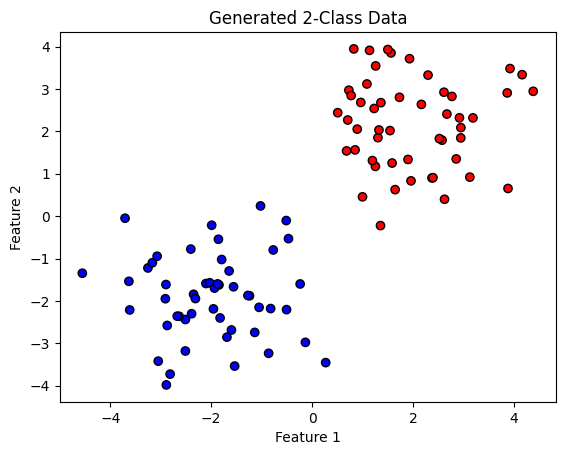

Linear SVM trained.
Polynomial (degree 3) SVM trained.
RBF (gamma=0.5) SVM trained.
RBF (gamma=2.0) SVM trained.


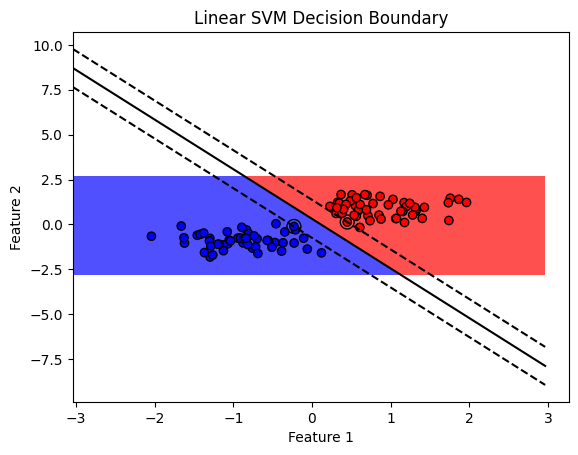

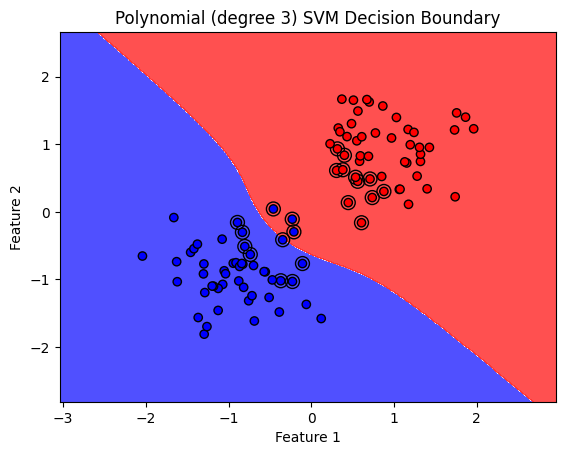

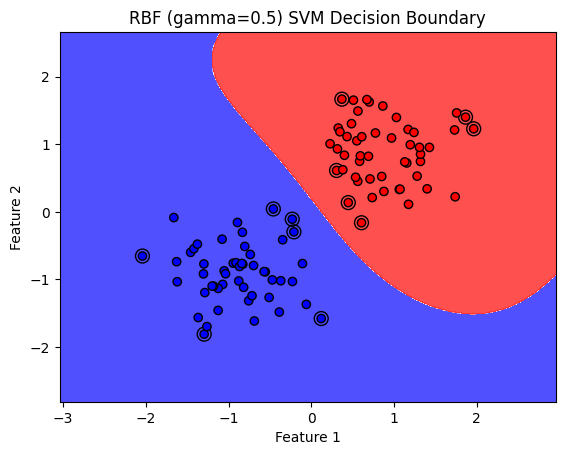

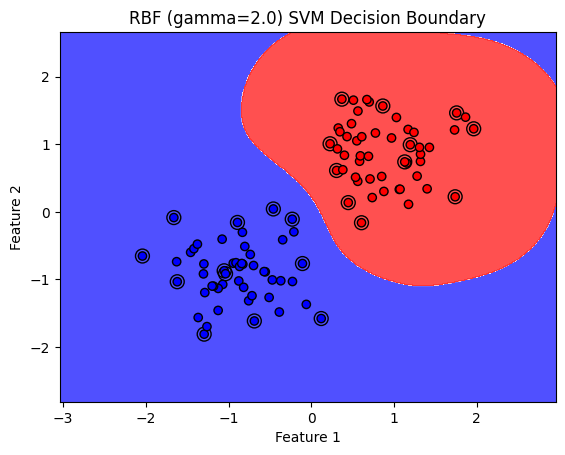

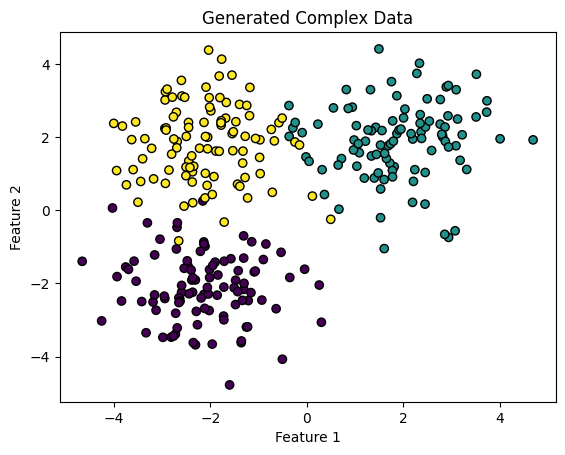

Linear SVM trained on complex data.
Polynomial (degree 3) SVM trained on complex data.
RBF (gamma=0.5) SVM trained on complex data.
RBF (gamma=2.0) SVM trained on complex data.


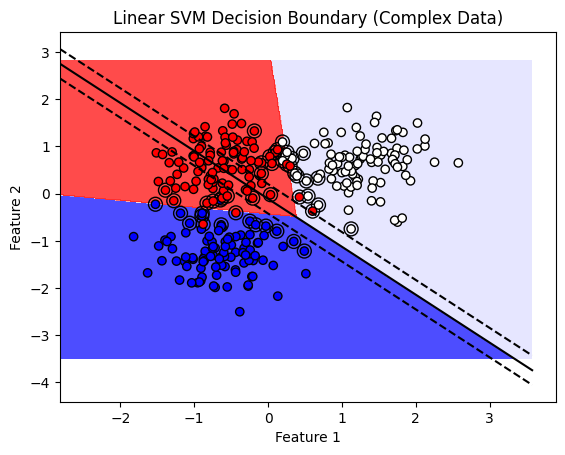

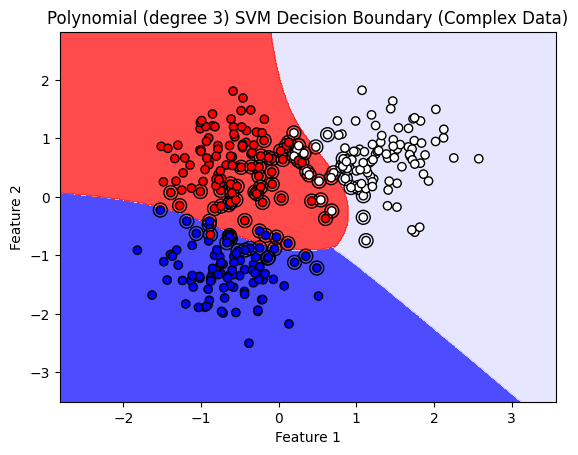

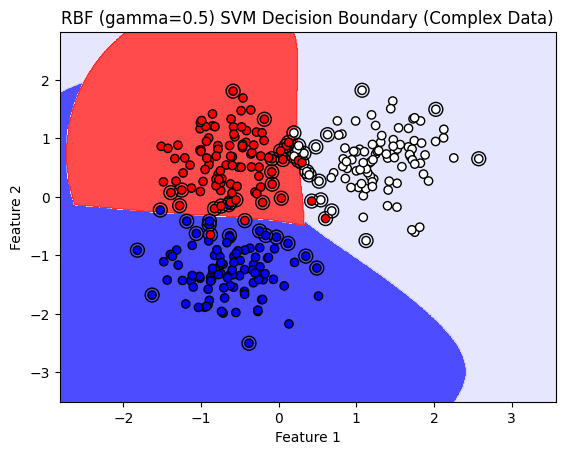

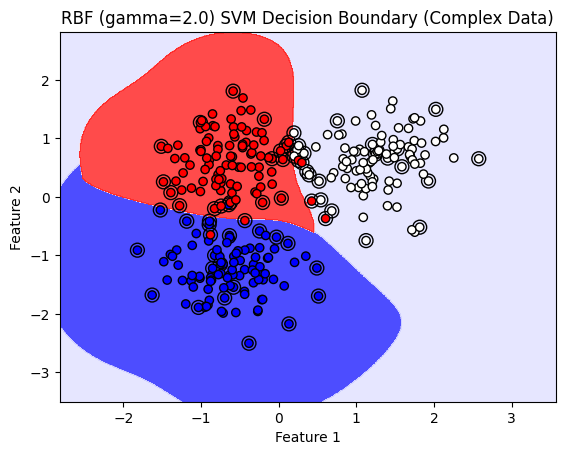

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#Generate a Simple 2-Class Dataset
np.random.seed(0)
X_class1 = np.random.randn(50, 2) - [2, 2]
X_class2 = np.random.randn(50, 2) + [2, 2]

X = np.vstack((X_class1, X_class2))
y = np.hstack((np.zeros(50), np.ones(50)))

# Plotting the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated 2-Class Data')
plt.show()

#Train SVM Models with Different Kernels and Parameters
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

models = {
    'Linear': SVC(kernel='linear',C=10000000),
    'Polynomial (degree 3)': SVC(kernel='poly', degree=3),
    'RBF (gamma=0.5)': SVC(kernel='rbf', gamma=0.5),
    'RBF (gamma=2.0)': SVC(kernel='rbf', gamma=2.0),
}

for name, model in models.items():
    model.fit(X_scaled, y)
    print(f"{name} SVM trained.")

#Visualize the Decision Boundaries and Margins
def plot_decision_boundary(model, X, y, title, kernel):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='bwr')

    support_vectors = model.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                facecolors='none', edgecolors='k')

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='bwr')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)

# For linear kernels, plot the margin lines
    if kernel == 'linear':
        coef = model.coef_[0]
        intercept = model.intercept_[0]
        a = -coef[0] / coef[1]
        xx_margin = np.linspace(x_min, x_max)
        yy_margin = a * xx_margin - intercept / coef[1]
        margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
        yy_margin_down = yy_margin - np.sqrt(1 + a ** 2) * margin
        yy_margin_up = yy_margin + np.sqrt(1 + a ** 2) * margin

        plt.plot(xx_margin, yy_margin, 'k-')
        plt.plot(xx_margin, yy_margin_down, 'k--')
        plt.plot(xx_margin, yy_margin_up, 'k--')

    plt.show()

for name, model in models.items():
    kernel_type = 'linear' if 'Linear' in name else 'non-linear'
    plot_decision_boundary(model, X_scaled, y, f'{name} SVM Decision Boundary', kernel_type)

#More Complex Data

X_complex = np.vstack([
    np.random.randn(100, 2) - [2, 2],
    np.random.randn(100, 2) + [2, 2],
    np.random.randn(100, 2) + [-2, 2]
])
y_complex = np.hstack([np.zeros(100), np.ones(100), np.ones(100) * 2])

plt.scatter(X_complex[:, 0], X_complex[:, 1], c=y_complex, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Complex Data')
plt.show()

X_complex_scaled = scaler.fit_transform(X_complex)

complex_models = {
    'Linear': SVC(kernel='linear'),
    'Polynomial (degree 3)': SVC(kernel='poly', degree=3),
    'RBF (gamma=0.5)': SVC(kernel='rbf', gamma=0.5),
    'RBF (gamma=2.0)': SVC(kernel='rbf', gamma=2.0),
}

for name, model in complex_models.items():
    model.fit(X_complex_scaled, y_complex)
    print(f"{name} SVM trained on complex data.")

for name, model in complex_models.items():
    kernel_type = 'linear' if 'Linear' in name else 'non-linear'
    plot_decision_boundary(model, X_complex_scaled, y_complex, f'{name} SVM Decision Boundary (Complex Data)', kernel_type)


#Part 2:

In MLP I have used Fashion_Mnist data set so I will use it again here as well.


---



> As you can see below I tried 3 types of kernel in the code below to implement classification on Fashion_Mnist dagtaset using SVM. But the accuracies were les than MLP which was 91%. the best accuracy here was for the RBF Kernel with 88%.

*If I wanted to try all parameters it would took several hours of time so I only tried different kernels.*


Training SVM with linear kernel...
Accuracy with linear kernel: 0.85375
Training SVM with poly kernel...
Accuracy with poly kernel: 0.8684166666666666
Training SVM with rbf kernel...
Accuracy with rbf kernel: 0.8894166666666666

Best kernel: rbf with accuracy: 0.8894166666666666
Test accuracy with rbf kernel: 0.8828


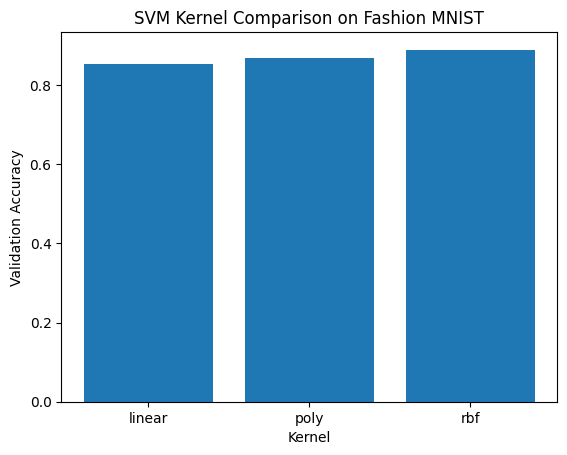

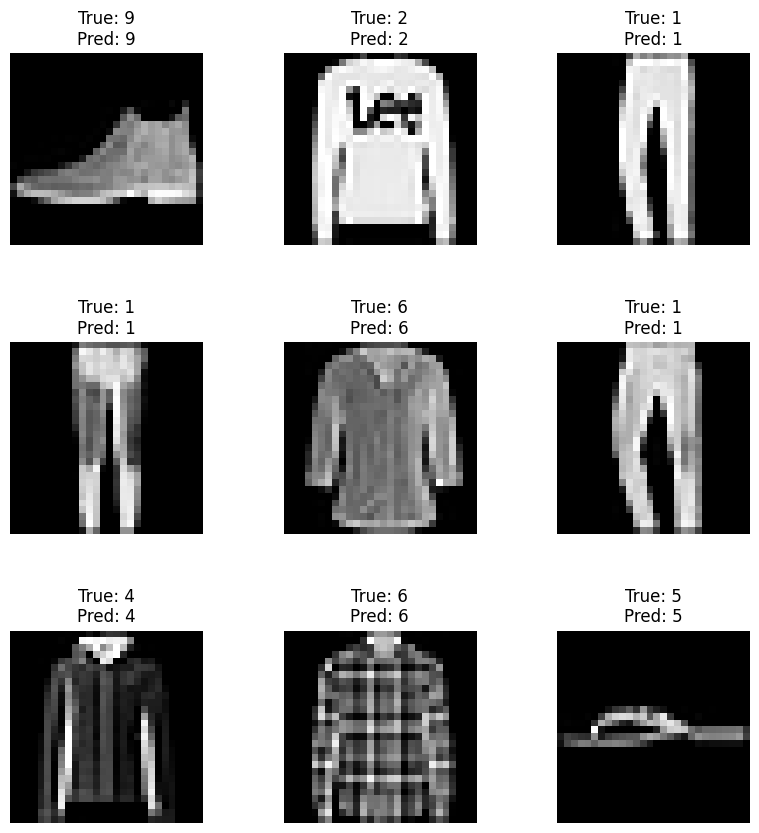

({'linear': 0.85375, 'poly': 0.8684166666666666, 'rbf': 0.8894166666666666},
 'rbf',
 0.8894166666666666,
 0.8828)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Flatten the images
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Split the training set further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train SVM with different kernels
kernels = ['linear', 'poly', 'rbf']
accuracies = {}

for kernel in kernels:
    print(f"Training SVM with {kernel} kernel...")
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    accuracy = metrics.accuracy_score(y_val, y_pred)
    accuracies[kernel] = accuracy
    print(f"Accuracy with {kernel} kernel: {accuracy}")

# Find the best kernel
best_kernel = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_kernel]

print(f"\nBest kernel: {best_kernel} with accuracy: {best_accuracy}")

# Train the best model on the full training set and evaluate on the test set
best_clf = svm.SVC(kernel=best_kernel)
best_clf.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)))
y_test_pred = best_clf.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print(f"Test accuracy with {best_kernel} kernel: {test_accuracy}")

# Visualize the results
plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Kernel')
plt.ylabel('Validation Accuracy')
plt.title('SVM Kernel Comparison on Fashion MNIST')
plt.show()

# Display some test images with their true and predicted labels
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

for i in np.arange(0, 9):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"True: {y_test[i]}\nPred: {y_test_pred[i]}")
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()

accuracies, best_kernel, best_accuracy, test_accuracy


#Part 3:

As you can see in the following code :



---



> First, I have loaded the data from different folders, the picture matrix in X and the label in Y variable.



> then i have separated the test and train datasets with a ratio of 0.2 for test set.


> After that I have trainded my SVM model on Train data using 3 different Kernels and I have computed the accuracy for all of them the I have chosen the best model respect to their accuracy. As you can see the Accuracy of polynomial and linear kernel is equal in 97%.


> Finally I have shown 25 random example of the dataset pictures and their True and Predicted Classes.






In [2]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
import matplotlib.pyplot as plt

# Define paths and parameters
data_dir = ''
img_size = (28, 28)
classes = ['2', '3', '7', 'S', 'W']

# Function to load and preprocess data
def load_data(data_dir, classes, img_size):
    X = []
    y = []
    for i, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img.flatten()
                X.append(img)
                y.append(i)

    X = np.array(X) / 255.0
    y = np.array(y)
    return X, y

# Load the data
X, y = load_data(data_dir, classes, img_size)


In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Train SVM with different kernels
kernels = ['linear', 'poly', 'rbf']
accuracies = {}

for kernel in kernels:
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracies[kernel] = accuracy
    print(f"Accuracy with {kernel} kernel: {accuracy}")

# Find the best kernel
best_kernel = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_kernel]

print(f"\nBest kernel: {best_kernel} with accuracy: {best_accuracy}")

# Train the best model on the full training set and evaluate on the test set
best_clf = svm.SVC(kernel=best_kernel)
best_clf.fit(X_train, y_train)
y_test_pred = best_clf.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print(f"Test accuracy with {best_kernel} kernel: {test_accuracy}")

# Display classification report
report = metrics.classification_report(y_test, y_test_pred, target_names=classes)
print(report)


Accuracy with linear kernel: 0.9666666666666667
Accuracy with poly kernel: 0.9666666666666667
Accuracy with rbf kernel: 0.9533333333333334

Best kernel: linear with accuracy: 0.9666666666666667
Test accuracy with linear kernel: 0.9666666666666667
              precision    recall  f1-score   support

           2       0.98      0.95      0.96        56
           3       0.97      1.00      0.98        65
           7       0.98      0.98      0.98        49
           S       0.94      0.97      0.96        66
           W       0.97      0.94      0.95        64

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



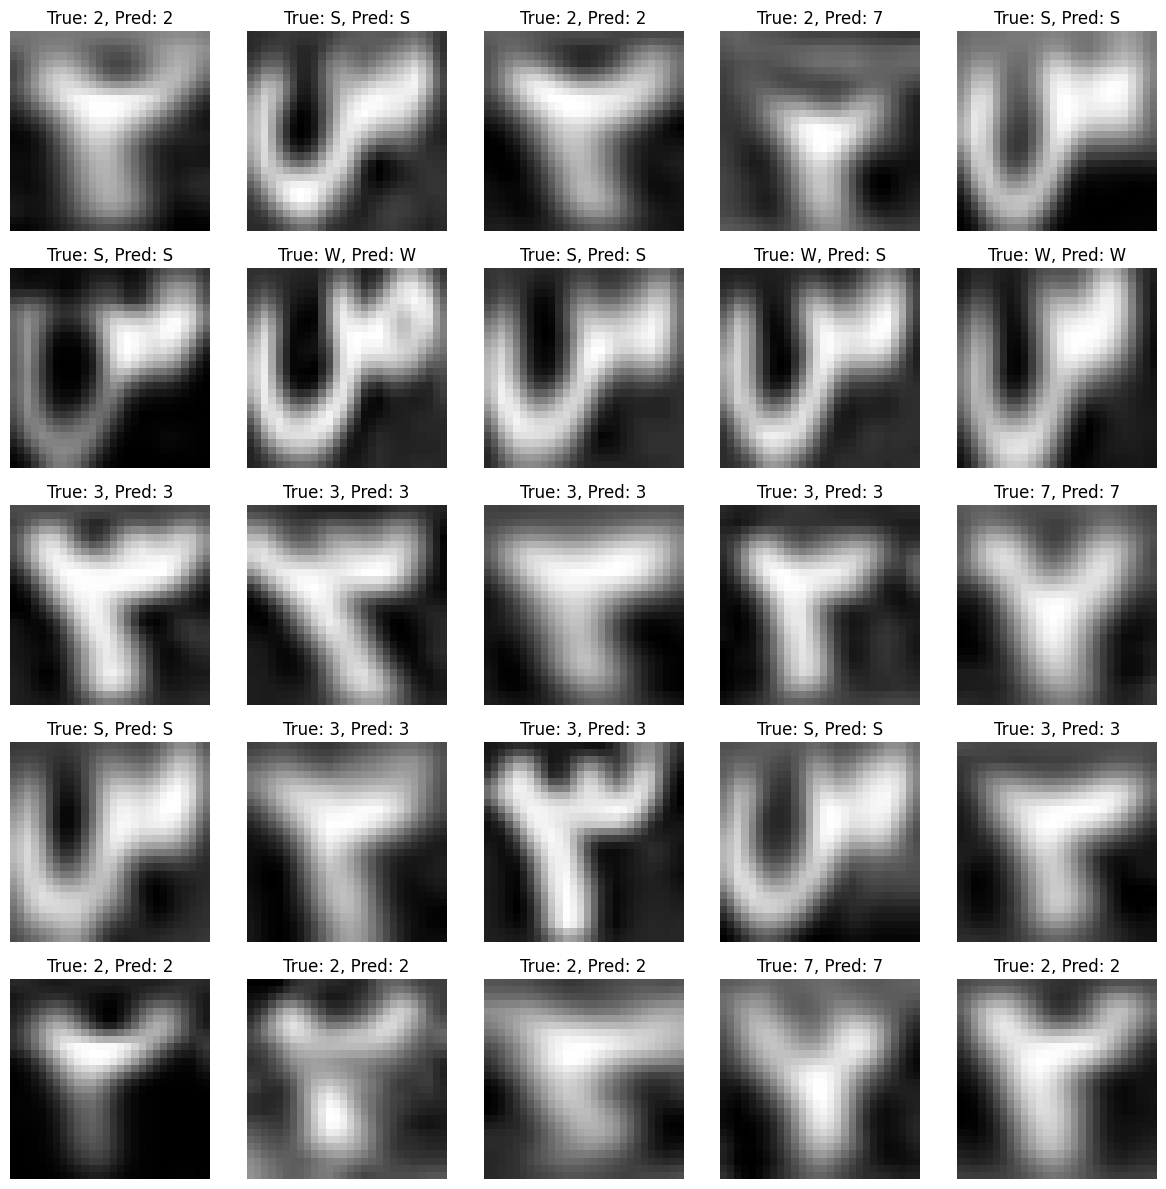

In [5]:
# Display some test images with their true and predicted labels
num_samples = 25
indices = np.random.choice(len(X_test), num_samples, replace=False)

plt.figure(figsize=(12, 12))
for i, index in enumerate(indices):
    img = X_test[index].reshape(28, 28)
    true_label = classes[y_test[index]]
    predicted_label = classes[y_test_pred[index]]

    plt.subplot(5, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


##Final Points :



> Overfitting Never happened in none of the parts.

> Accurracy in Train and Test sets were almost the same along the whole procedure.

>I have tried to use cross validation as much as it was possible in the codes.


